<a href="https://colab.research.google.com/github/willianrocha/bootcamp-datascience-alura/blob/main/module_3/ds_mod3_lecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

import pandas as pd
from pandas.plotting import autocorrelation_plot
from datetime import date
import seaborn as sns
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)

url = 'https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip'
dados = pd.read_csv(url, sep=";", parse_dates=[4])
dados_sp = dados.query("nome_munic == 'São Paulo'")
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()
dados_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,media_movel_casos,media_movel_obitos
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN,NaN,NaN
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,NaN,NaN
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,NaN,NaN
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0,NaN,NaN
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0,NaN,NaN


In [31]:
def basic_model(data, x, y, xlabel=None, ylabel=None,
                cut=400,
                prevision_date=30,
                n_changepoints=25,
                changepoint_prior_scale=0.5):
  if xlabel is None:
    xlabel = x
  if ylabel is None:
    ylabel = y
  df = pd.DataFrame()
  df['ds'] = data[x][:cut]
  df['y'] = data[y][:cut]
  df_teste = pd.DataFrame()
  df_teste['ds'] = data[x][cut:]
  df_teste['y'] = data[y][cut:]
  modelo = Prophet(
      n_changepoints=n_changepoints,
      changepoint_prior_scale=changepoint_prior_scale,)
  modelo.fit(df)
  dataframefuturo = modelo.make_future_dataframe(periods=prevision_date)
  previsao = modelo.predict(dataframefuturo)

  fig = modelo.plot(previsao, xlabel=xlabel, ylabel=ylabel, figsize=(10,6))
  plt.plot(df_teste['ds'], df_teste['y'], '.r')
  add_changepoints_to_plot(fig.gca(), modelo, previsao)
  plt.show()
  return modelo, df, previsao

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


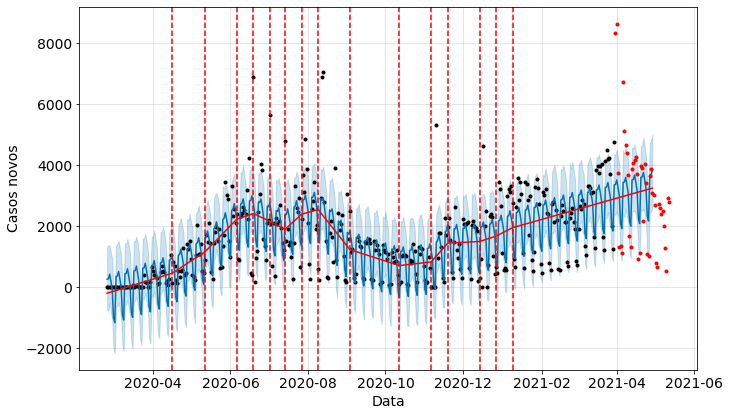

In [34]:
modelo, _, _ = basic_model(data=dados_sp, x='datahora', y='casos_novos',
            xlabel='Data', ylabel='Casos novos',
            cut=400,  prevision_date=30, n_changepoints=25,
            changepoint_prior_scale=10)

In [35]:
  cut = 400
  x='datahora'
  y='casos_novos'
  xlabel='Data'
  ylabel='Casos novos'
  df = pd.DataFrame()
  df['ds'] = dados_sp[x][:cut]
  df['y'] = dados_sp[y][:cut]
  df_teste = pd.DataFrame()
  df_teste['ds'] = dados_sp[x][cut:]
  df_teste['y'] = dados_sp[y][cut:]
  

In [36]:
modelo = Prophet(changepoint_prior_scale=10)
modelo.add_country_holidays('BR')
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=30)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


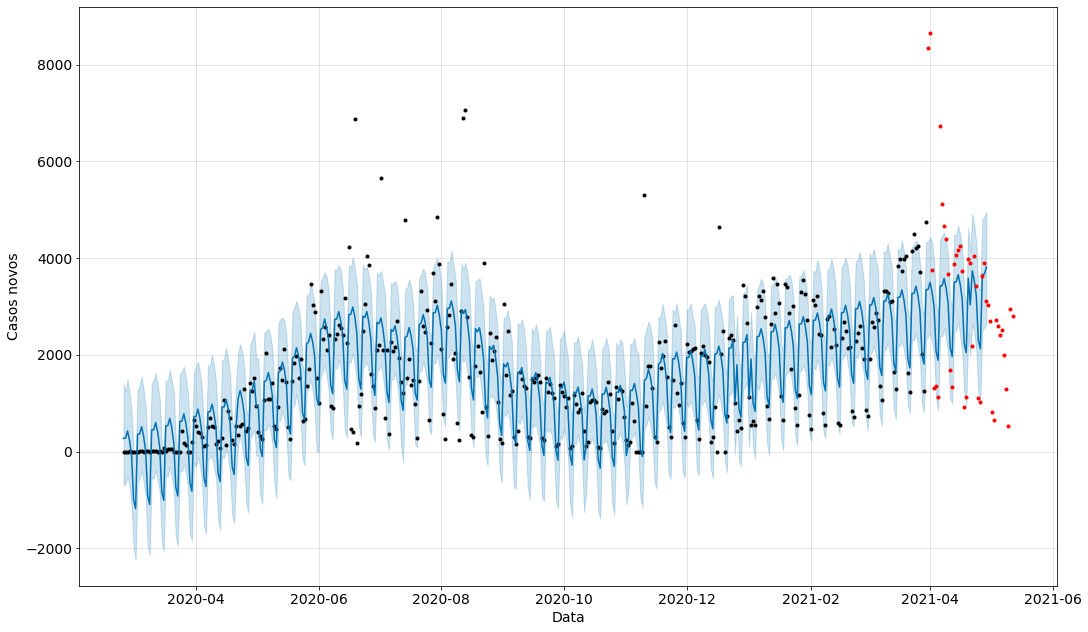

In [37]:
fig = modelo.plot(previsao, xlabel=xlabel, ylabel=ylabel, figsize=(15,9))
plt.plot(df_teste['ds'], df_teste['y'], '.r')
# add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.show()

In [38]:
feriados_sp_2020= [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21',
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021= [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-4-21',
'2021-05-01'
]

In [39]:
feriados_sp_2020 = pd.DataFrame({
    'holiday' : 'sp_2020',
    'ds' : pd.to_datetime(feriados_sp_2020)
})
feriados_sp_2021 = pd.DataFrame({
    'holiday' : 'sp_2021',
    'ds' : pd.to_datetime(feriados_sp_2021)
})
feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [40]:
feriados

,holiday,ds
0,sp_2020,2020-02-25
1,sp_2020,2020-02-26
2,sp_2020,2020-04-10
3,sp_2020,2020-04-21
4,sp_2020,2020-05-01
5,sp_2020,2020-05-20
6,sp_2020,2020-05-21
7,sp_2020,2020-05-22
8,sp_2020,2020-05-25
9,sp_2020,2020-06-11


In [41]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados)
modelo_feriados.fit(df)
dataframefuturo_feriados = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo_feriados)
df_holiday = df.copy()
previsao_holiday = previsao.copy()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


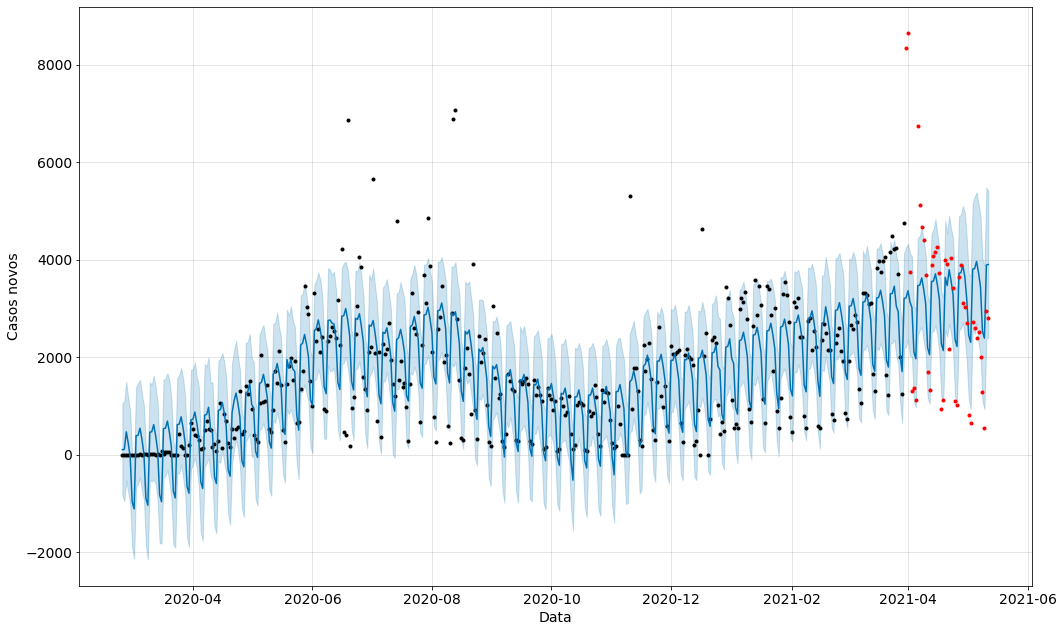

In [42]:
fig = modelo_feriados.plot(previsao, xlabel=xlabel, ylabel=ylabel, figsize=(15,9))
plt.plot(df_teste['ds'], df_teste['y'], '.r')
# add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.show()

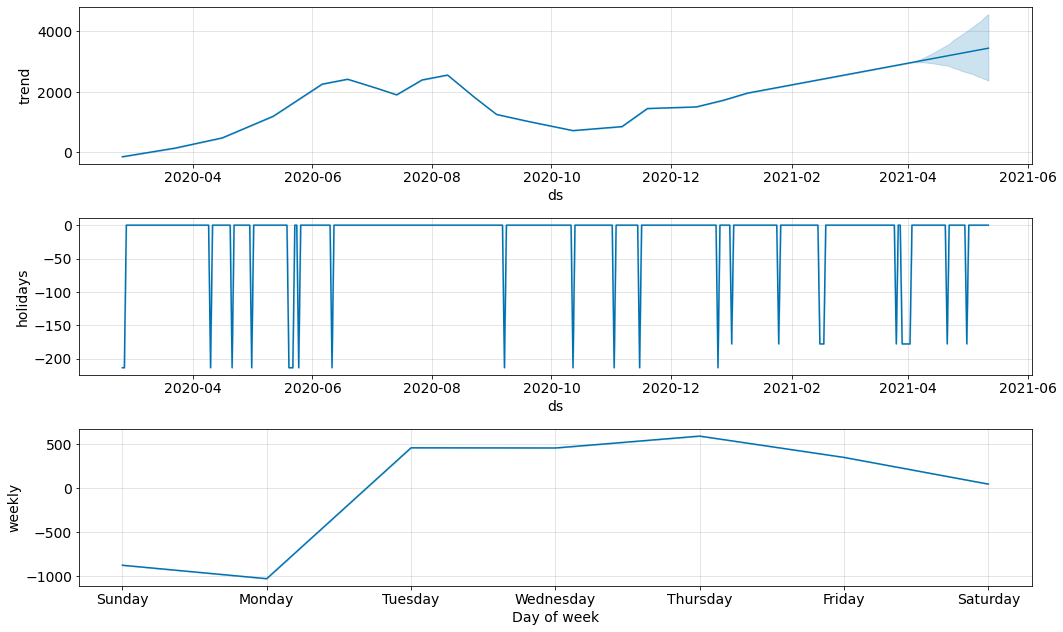

In [43]:
 modelo_feriados.plot_components(previsao, figsize=(15,9));

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
# Sazonalidade additiva
mean_absolute_error(df['y'], previsao['yhat'][:400])

536.6084252994144

In [46]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df)
dataframefuturo_feriados = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo_feriados)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
# Sazonalidade Multiplicativa
mean_absolute_error(df['y'], previsao['yhat'][:400])

452.3618279357078

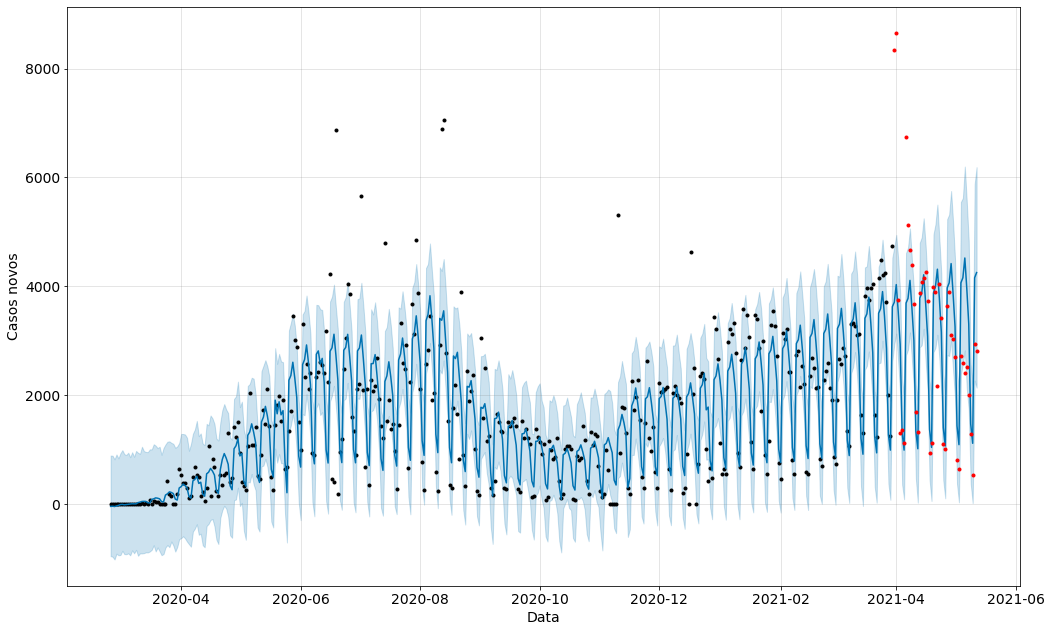

In [48]:
fig = modelo_feriados.plot(previsao, xlabel=xlabel, ylabel=ylabel, figsize=(15,9), )
plt.plot(df_teste['ds'], df_teste['y'], '.r')
# add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.show()

# Desafios

# Mudar linha dos dados originais

## Desafio Extra: Utilizar outras métricas do Scikitlearn e comparar os resultados.

In [49]:
# Sazonalidade additiva
# mean_absolute_error(df['y'], previsao['yhat'][:400])
from sklearn.metrics import mean_squared_error
mean_squared_error(df['y'], previsao['yhat'][:400])

523056.0437642187

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


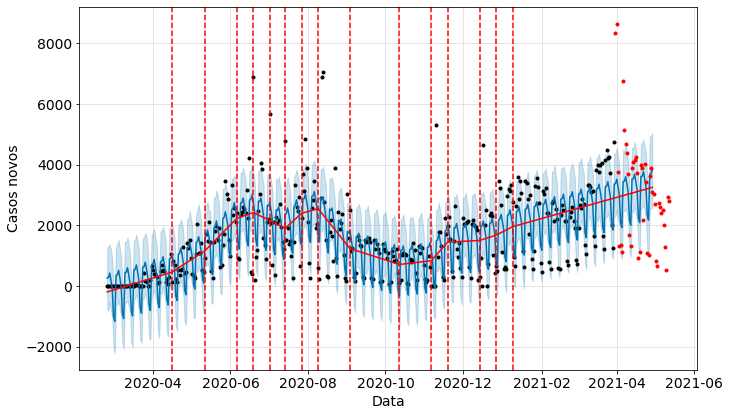

In [50]:
_, df_no_holiday, previsao_no_holiday = basic_model(data=dados_sp, x='datahora', y='casos_novos',
            xlabel='Data', ylabel='Casos novos',
            cut=400,  prevision_date=30, n_changepoints=25,
            changepoint_prior_scale=10)

In [51]:
mse_no_holiday = mean_squared_error(df_no_holiday['y'], previsao_no_holiday['yhat'][:400])
mae_no_holiday = mean_absolute_error(df_no_holiday['y'], previsao_no_holiday['yhat'][:400])
mse_holiday = mean_squared_error(df_holiday['y'], previsao_holiday['yhat'][:400])
mae_holiday = mean_absolute_error(df_holiday['y'], previsao_holiday['yhat'][:400])

In [52]:
print(f"No Holiday MSE: {mse_no_holiday}, MAE: {mae_no_holiday}")
print(f"Holiday MSE: {mse_holiday}, MAE: {mae_holiday}")

No Holiday MSE: 611267.3930464347, MAE: 539.5699598205333
Holiday MSE: 609349.6549722457, MAE: 536.6084252994144
